In [9]:
# Plot the spectrum as a function of viewing angle
# Editing started by MM on 1/13/2015
# converting to ipynb on 4/15/2015

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.convolution import Gaussian1DKernel, convolve, Box1DKernel
from scipy.interpolate import interp1d
from scipy.integrate import quad
from glob import glob

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 16

## Single spectrum varying viewing angle

In [17]:
specnames = ('theta','phi','lambda','flux','empty1','empty2','empty3')

spec = ascii.read("WD06_spectra/WD06_d20.par",
                  format='no_header',
                  guess=False,
                  names=specnames,
                  delimiter=' ')


print "spectrum read ..."
thetalist = np.unique(spec['theta'])
philist = np.unique(spec['phi'])

#trim the wavelenth range 
lmin = 2000
lmax = 8000
spec = spec[(spec['lambda']>lmin)&(spec['lambda']<lmax)].copy()
dl = spec['lambda'][1] - spec['lambda'][0]
print "wavelength range trimmed..., dl=",dl

spectrum read ...
wavelength range trimmed..., dl= 10.0


15


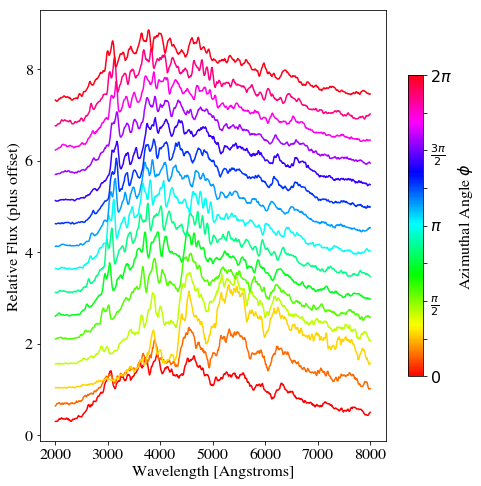

In [18]:
# each Nth entry, gaussian kernal
plt.figure(figsize=(7,7))
skip = 2
width = 3 # in 10's of Angstroms (ie nm)
kern = Box1DKernel(width,mode='oversample')


theta_select = 60.0001 #14.8351 #88.0899
specm = spec[spec['theta'] == theta_select]
angles = philist


mycolor=plt.cm.hsv
nl = len(angles[::skip])
print nl 


lblist = []
for i,select in enumerate(angles[::skip]) :
    # select the correct spectrum 
    mask = (specm['phi']==select)
    lbol = np.sum(specm[mask]['flux'])*dl
    norm = lbol/(lmax-lmin)
    offset = i/2.
    plt.plot(specm[mask]['lambda'],
             convolve(specm[mask]['flux']/norm + offset,kern,boundary='extend'),
             color=mycolor(1.0*i/(len(angles[::skip])-1)),
             linewidth=1.5
             )
    
    
# create a colorbar
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=0, vmax=2*np.pi))
sm._A = []
cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=0.7)

myticks = np.linspace(0.,2.,9)*np.pi
mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
cb.set_ticks(myticks)
cb.set_ticklabels(mylabel)

plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Relative Flux (plus offset)')
plt.tight_layout(pad=1)
plt.show()
#plt.savefig("spectra_viewing_angle_d20.pdf")

## Spectral timeseries

In [19]:
def read_spectrum(filename):
    specnames = ('theta','phi','lambda','flux','empty1','empty2','empty3')
    spec = ascii.read(filename,
                      format='no_header',
                      guess=False,
                      names=specnames,
                      delimiter=' ')


    print "spectrum read ...",fn
    thetalist = np.unique(spec['theta'])
    philist = np.unique(spec['phi'])

    #trim the wavelenth range 
    lmin = 2000
    lmax = 8000
    spec = spec[(spec['lambda']>lmin)&(spec['lambda']<lmax)].copy()
    dl = spec['lambda'][1] - spec['lambda'][0]
    print "wavelength range trimmed..., dl=",dl
    
    return thetalist,philist,spec

spectrum read ...
wavelength range trimmed..., dl= 10.0
spectrum read ...
wavelength range trimmed..., dl= 10.0
spectrum read ...
wavelength range trimmed..., dl= 10.0
spectrum read ...
wavelength range trimmed..., dl= 10.0


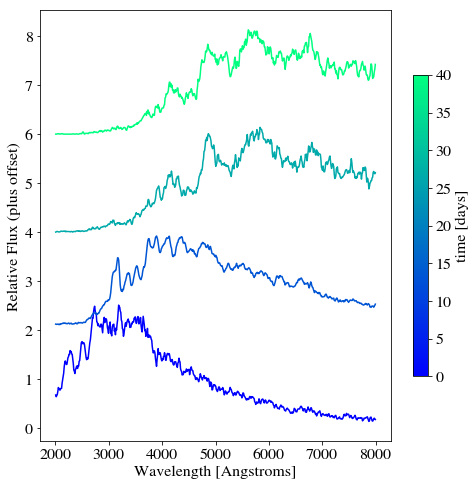

In [24]:
spec_file_list = glob("WD06_spectra/WD06_d[0-9][0-9].par")


plt.figure(figsize=(7,7))

# select a viewing angle
theta_select = 60.0001
phi_select = 4.0841


mycolor=plt.cm.winter
nl = len(spec_file_list)

for i, fn in enumerate(spec_file_list):
    th,ph,spec = read_spectrum(fn)
    mask = (spec['theta']==theta_select) & (spec['phi']==phi_select)
    lbol = np.sum(spec[mask]['flux'])*dl
    norm = lbol/(lmax-lmin)
    offset = 2*i
    
    plt.plot(spec[mask]['lambda'],
             convolve(spec[mask]['flux']/norm + offset,kern,boundary='extend'),
             color=mycolor(1.0*i/(nl-1)),
             linewidth=1.5
             )
    
# create a colorbar
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=0, vmax=40))
sm._A = []
cb = plt.colorbar(sm,label=r'time [days]',orientation='vertical',shrink=0.7)


plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Relative Flux (plus offset)')
plt.tight_layout(pad=1)
plt.show()